In [1]:
import gridgeo

gridgeo.__version__

'0.1.0'

In [2]:
url = ('http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/'
       'Projects/Sandy/triple_nest/00_dir_NYB05.ncml')

grid = gridgeo.GridGeo(url)
grid

### The grid object a `__geo_interface__` property

In [3]:
grid.__geo_interface__.keys()

['type', 'coordinates']

### There are many ways to visualize the grid

### The grid outline

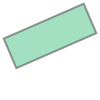

In [4]:
grid.outline

### The grid cells

(Note that displaying all the polygons is an expensive operation and might crash the browser.)

There are 36464 polygons.


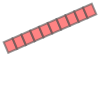

In [5]:
print('There are {} polygons.'.format(len(grid.polygons)))

grid.polygons[0:10]

### A numpy array (raster image)

In [6]:
img = grid.raster

type(img)

/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


numpy.ndarray

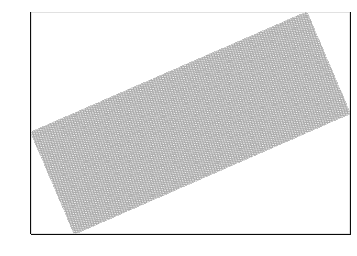

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(img)
_ = ax.axis('off')

### The `properties` and `methods`

 ### The original grid `object`

In [8]:
grid.grid

### The mesh type

In [9]:
grid.mesh

'sgrid'

### The original file/object reference

In [10]:
grid.nc

'http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/Projects/Sandy/triple_nest/00_dir_NYB05.ncml'

### The `to_geojson()` method returns a styled geojson-like `dict`
(See https://github.com/mapbox/simplestyle-spec/tree/master/1.1.0 for styling options.)

In [11]:
properties = dict(fill='#fd7d11',
                  fill_opacity=0.2,
                  stroke_opacity=1)

geojson = grid.to_geojson(**properties)

geojson['properties']

{'description': '',
 'fill': '#fd7d11',
 'fill-opacity': 0.6,
 'marker-color': '7e7e7e',
 'marker-size': 'medium',
 'marker-symbol': '',
 'stroke': '555555',
 'stroke-opacity': 1,
 'stroke-width': 2,
 'title': 'sgrid'}

### Saving the grid to as geojson file

In [12]:
import json

kw = dict(sort_keys=True, indent=4, separators=(',', ': '))
with open('grid.geojson','w') as f:
    json.dump(geojson, f, **kw)

### or as a shapefile

In [13]:
import fiona

schema = {'geometry': 'MultiPolygon',
          'properties': {'name': 'str:{}'.format(len(grid.mesh))}}

with fiona.open('grid.shp', 'w', 'ESRI Shapefile', schema) as f:
    f.write({'geometry': grid.__geo_interface__,
             'properties': {'name': grid.mesh}})

### or just plot using folium ;-)

In [14]:
import folium

x, y = grid.outline.centroid.xy

mapa = folium.Map(location=[y[0], x[0]])

folium.GeoJson(grid.outline.__geo_interface__).add_to(mapa)

min_lon, min_lat, max_lon, max_lat = grid.outline.bounds
mapa.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
mapa